In [8]:

import numpy as np
import scipy
from  scipy import linalg
from matplotlib import pyplot as plt
from scipy import sparse

EX 1 and EX 2

In [2]:
def pb1_jacobi(A,b,tol,maxiter,plot=False):    
    D=np.diag(A)
    
    x_0=np.zeros(b.shape)
    x_sol=np.ones(b.shape)
    itera=0
    err=np.empty([1,])
    while (np.linalg.norm(x_sol-x_0,np.inf)>tol) & (itera<=maxiter):
        x_0=x_sol.copy()
        x_sol=x_0+(b-np.dot(A,x_0))/D
        itera=itera+1
        err=np.append(err,np.linalg.norm(x_sol-x_0,np.inf))
    if plot==True:
        from matplotlib import pyplot as plt
        plt.figure(1)
        plt.plot(err[1:])
        plt.title("Convergence of Jacobi method")
        plt.xlabel("iteration")
        plt.ylabel("Ans err of approximation")
    return x_sol    
        
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
    n (int): The dimension of the system.
    num_entries (int): The number of nonzero values.
    Defaults to n^(3/2)-n.
    Returns:
    A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

n=100
tol=1e-10
maxiter=1000
b=np.random.random(n)
A=diag_dom(n)
x=pb1_jacobi(A,b,tol,maxiter,True)

print("Are Ax and b close? ",np.allclose(np.dot(A,x),b))

Are Ax and b close?  True


EX 3

In [3]:
def gauss_seidel(A,b,tol,maxiter,plot=False):
    D=np.diag(A)
    
    x_0=np.zeros(b.shape)
    x_sol=np.ones(b.shape)
    itera=0
    err=np.empty([1,])
    while (np.linalg.norm(x_sol-x_0,np.inf)>tol) & (itera<=maxiter):
        x_0=x_sol.copy()
        x_sol[0]=x_0[0]+(b[0]-np.dot(A[0,:],x_0))/D[0]
        for i in range(1,len(x_0)):
            x_0[i-1]=x_sol[i-1].copy()
            x_sol[i]=x_0[i]+(b[i]-np.dot(A[i,:],x_0))/D[i]       
        itera=itera+1
        err=np.append(err,np.linalg.norm(x_sol-x_0,np.inf))
    if plot==True:
        from matplotlib import pyplot as plt
        plt.figure(1)
        plt.plot(err[1:])
        plt.title("Convergence of Jacobi method")
        plt.xlabel("iteration")
        plt.ylabel("Ans err of approximation")
    return x_sol , itera   
        
n=100
tol=1e-10
maxiter=1000
b=np.random.random(n)
A=diag_dom(n)
x,itera=gauss_seidel(A,b,tol,maxiter,True)

print("Are Ax and b close? ",np.allclose(np.dot(A,x),b))
print("no of iterations: ", itera)

Are Ax and b close?  True
no of iterations:  16


EX 4

In [4]:
def gauss_seidel_sparse(A,b,tol,maxiter,plot=False):
    D=A.diagonal()
    
    x_0=np.zeros(b.shape)
    x_sol=np.ones(b.shape)
    itera=0
    err=np.empty([1,])
    while (np.linalg.norm(x_sol-x_0,np.inf)>tol) & (itera<=maxiter):
        x_0=x_sol.copy()
        
        rowstart = A.indptr[0]
        rowend = A.indptr[1]
        Aix = A.data[rowstart:rowend] @ x_0[A.indices[rowstart:rowend]]
        x_sol[0]=x_0[0]+(b[0]-Aix)/D[0]
        for i in range(1,len(x_0)):
            x_0[i-1]=x_sol[i-1].copy()
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x_0[A.indices[rowstart:rowend]]
            x_sol[i]=x_0[i]+(b[i]-Aix)/D[i]
            
        itera=itera+1
        err=np.append(err,np.linalg.norm(x_sol-x_0,np.inf))
    if plot==True:
        from matplotlib import pyplot as plt
        plt.figure(1)
        plt.plot(err[1:])
        plt.title("Convergence of Jacobi method")
        plt.xlabel("iteration")
        plt.ylabel("Ans err of approximation")
    return x_sol,itera    


n=500
A=sparse.csr_matrix(diag_dom(n))
b=np.random.random(n)
tol=1e-10
maxiter=1000
x,itera=gauss_seidel_sparse(A,b,tol,maxiter,True)
print("no of iterations: ", itera)

no of iterations:  12


EX 5

In [5]:
def gauss_seidel_sparse_rel(A,b,w,tol,maxiter,plot=False):
    D=A.diagonal()
    
    x_0=np.zeros(b.shape)
    x_sol=np.ones(b.shape)
    itera=0
    err=np.empty([1,])
    while (np.linalg.norm(x_sol-x_0,np.inf)>tol) & (itera<=maxiter):
        x_0=x_sol.copy()
        
        rowstart = A.indptr[0]
        rowend = A.indptr[1]
        Aix = A.data[rowstart:rowend] @ x_0[A.indices[rowstart:rowend]]
        x_sol[0]=x_0[0]+w*(b[0]-Aix)/D[0]
        for i in range(1,len(x_0)):
            x_0[i-1]=x_sol[i-1].copy()
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x_0[A.indices[rowstart:rowend]]
            x_sol[i]=x_0[i]+w*(b[i]-Aix)/D[i]
            
        itera=itera+1
        err=np.append(err,np.linalg.norm(x_sol-x_0,np.inf))
    if plot==True:
        from matplotlib import pyplot as plt
        plt.figure(1)
        plt.plot(err[1:])
        plt.title("Convergence of Jacobi method")
        plt.xlabel("iteration")
        plt.ylabel("Ans err of approximation")
    return x_sol,itera    

from scipy import sparse
n=500
A=sparse.csr_matrix(diag_dom(n))
b=np.random.random(n)
tol=1e-10
maxiter=1000
w=1.2
x,itera=gauss_seidel_sparse_rel(A,b,w,tol,maxiter,True)
print("no of iterations: ", itera)


no of iterations:  25


EX 6

no of iterations:  176


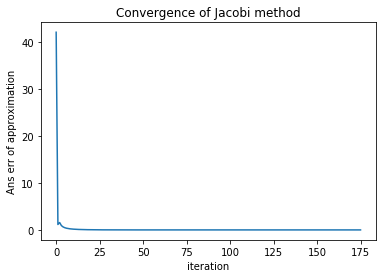

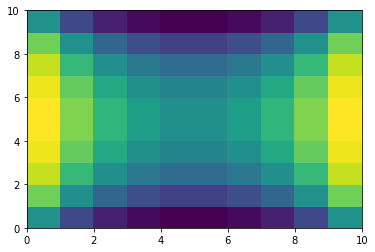

In [12]:
def lapl_eq(n):
    B1=-4*np.eye(n)
    B2=np.zeros([n,n])
    B2[1:,:-1]=np.eye(n-1)
    B3=np.zeros([n,n])
    B3[:-1,1:]=np.eye(n-1)
    B=B1+B2+B3
    a=[B]*n
    A=linalg.block_diag(*a)
    
    n1=A.shape[0]
    A1=np.zeros([n1,n1])
    A1[n:,:-n]=np.eye(n1-n)
    A2=np.zeros([n1,n1])
    A2[:-n,n:]=np.eye(n1-n)
    A=A+A1+A2
    
    b=np.tile(np.append(np.append(-100.,np.zeros([n-2,])),-100.),n)
    return A,b


n=10
A,b=lapl_eq(n)
A=sparse.csr_matrix(A)

tol=1e-10
maxiter=1000
w=1.2
x,itera=gauss_seidel_sparse_rel(A,b,w,tol,maxiter,True)
U=np.reshape(x,(n,n))
print("no of iterations: ", itera)
plt.figure(6)
plt.pcolormesh(U)
plt.show()

EX 7

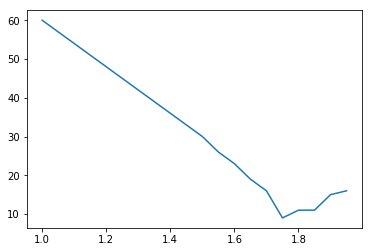

The optimal relaxation w =  1.75


In [13]:
n=20
A,b=lapl_eq(n)
A=sparse.csr_matrix(A)

tol=1e-2
maxiter=1000

Itera=np.zeros([20,])
W=np.linspace(1,1.95,20)
for i in range(20):
    x,Itera[i]=gauss_seidel_sparse_rel(A,b,W[i],tol,maxiter,False)
    
plt.figure(7)
plt.plot(W,Itera)
plt.show()
print("The optimal relaxation w = ",W[np.argmin(Itera)])

